# Contents
- [K-means Clustering](#K-Means-Clustering)
- [K-Means Clustering with real dataset without ground truth PCA](#k-means-clustering-with-real-dataset-without-ground-truth-pca)
- [K-Means Clustering with real datasets with ground truth](#k-means-clustering-with-real-datasets-with-ground-truth)
- [Hierarchical Clustering](#hierarchical-clustering)

### K-Means Clustering

back to [Top](#contents)

#### Understanding K-Means Clustering using sklearn Package
Lets take an example with marks of 22 students for 2 subjects.

**The problem is to find groups of excellent and under performing students.**

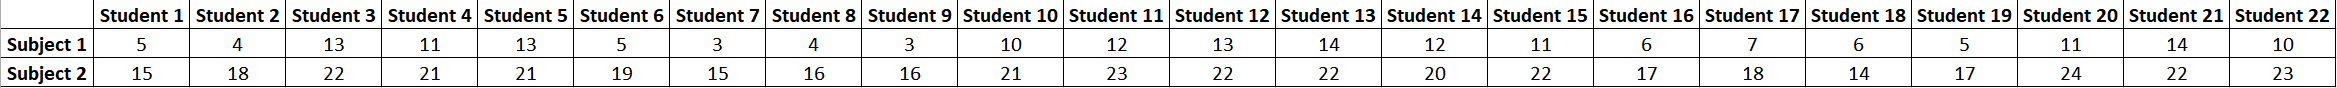

Visualize and understand the intput data.

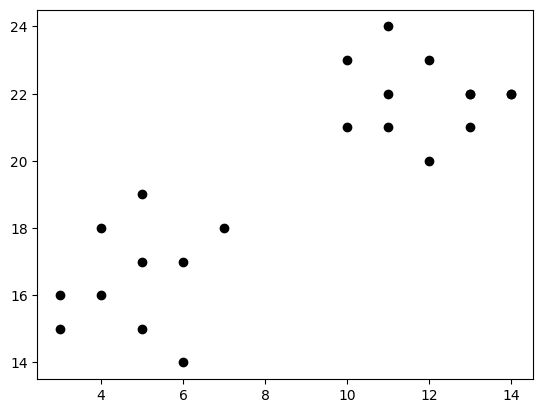

In [109]:
import matplotlib.pyplot as plt

x = [ 5,  4, 13, 11, 13,  5,  3,  4,  3, 10, 12, 13, 14, 12, 11,  6,  7,  6,  5, 11, 14, 10]
y = [15, 18, 22, 21, 21, 19, 15, 16, 16, 21, 23, 22, 22, 20, 22, 17, 18, 14, 17, 24, 22, 23]

plt.scatter(x, y, color='black')
plt.show()

Data processing

In [110]:
data = list(zip(x, y))
print(data)

[(5, 15), (4, 18), (13, 22), (11, 21), (13, 21), (5, 19), (3, 15), (4, 16), (3, 16), (10, 21), (12, 23), (13, 22), (14, 22), (12, 20), (11, 22), (6, 17), (7, 18), (6, 14), (5, 17), (11, 24), (14, 22), (10, 23)]


The K-Means Clustering

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(data)

c=kmeans.labels_
print(c)

[0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1]


The K-Means Clustering

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=1, n_init='auto')
kmeans.fit(data)

c=kmeans.labels_
print(c)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Visualize the clusters

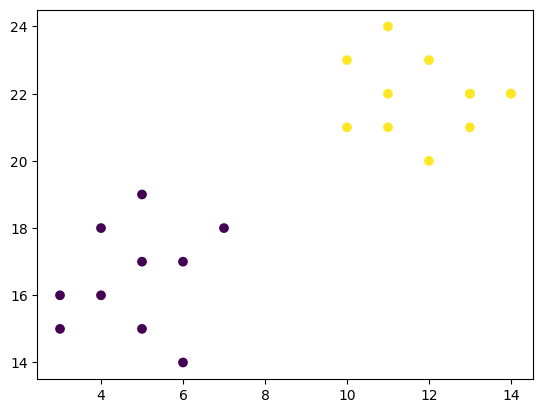

In [14]:
plt.scatter(x, y, c=kmeans.labels_)
plt.show()

#### Cluster Evaluation without Ground-Truth
**Silhouette Coefficient**

The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.

1. The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

2. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

3. The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [15]:
from sklearn import metrics

metrics.silhouette_score(data, c, metric='euclidean')

np.float64(0.7214539689632106)

**Calinski-Harabasz Index**

Also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared).

1. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

2. The score is fast to compute.

3. The Calinski-Harabasz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [16]:
metrics.calinski_harabasz_score(data, c)

np.float64(121.287792326368)

**Davies-Bouldin Index**

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

1. Zero is the lowest possible score. Values closer to zero indicate a better partition.

2. The computation of Davies-Bouldin is simpler than that of Silhouette scores.

3. The index is solely based on quantities and features inherent to the dataset as its computation only uses point-wise distances

4. The Davies-Boulding index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained from DBSCAN.

5. The usage of centroid distance limits the distance metric to Euclidean space.

In [17]:
metrics.davies_bouldin_score(data, c)

np.float64(0.38191565365304037)

[515.8181818181818, 73.01666666666668, 54.6, 35.6, 26.266666666666666, 20.166666666666664, 20.966666666666665, 13.666666666666668, 10.333333333333332, 10.166666666666666]


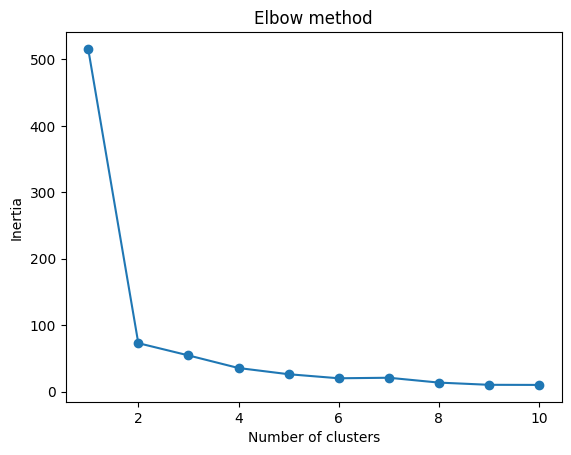

In [19]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []			# SSE/WCSS - actual errors

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

print(inertias)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [112]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []			# SSE/WCSS - actual errors

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(data)
    c = kmeans.labels_
    print(c)
    inertias.append(metrics.silhouette_score(data, c, metric='euclidean'))

print(inertias)

[1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0]
[2 0 1 1 1 0 2 2 2 1 1 1 1 1 1 0 0 2 0 1 1 1]
[2 0 3 1 3 0 2 2 2 1 1 3 3 3 1 0 0 2 0 1 3 1]
[1 3 0 2 0 3 4 4 4 2 2 0 0 0 2 1 3 1 1 2 0 2]
[0 5 1 2 1 5 0 0 0 2 1 1 1 2 2 3 3 4 0 1 1 2]
[2 6 1 3 1 6 2 2 2 3 4 1 1 3 4 0 0 5 2 4 1 4]
[2 0 4 1 4 0 5 5 5 1 7 4 4 6 1 3 3 2 3 7 4 1]
[5 6 1 4 1 6 2 8 8 4 1 1 1 4 4 0 0 7 0 3 1 3]
[3 1 0 2 0 7 5 5 5 2 0 0 0 8 2 1 6 9 1 4 0 4]
[np.float64(0.7214539689632106), np.float64(0.5594664579151426), np.float64(0.40595784802971724), np.float64(0.3334379776980799), np.float64(0.3033002307248607), np.float64(0.3504537668628618), np.float64(0.3616195247331272), np.float64(0.30664816893931085), np.float64(0.23743407974554964)]


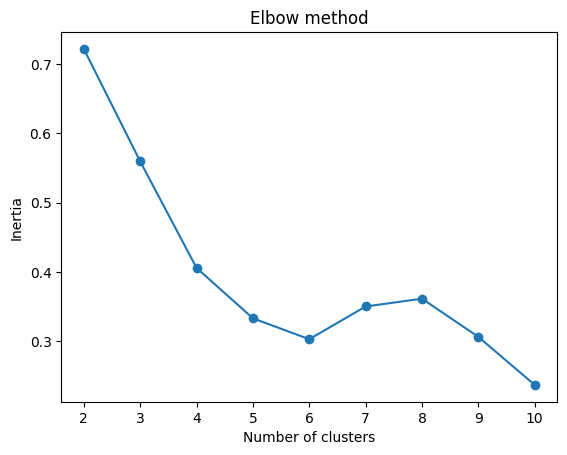

In [114]:
plt.plot(range(2,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

##### Lets check another example.

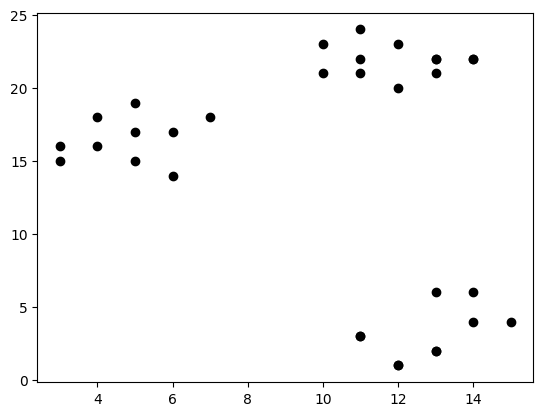

In [21]:

import matplotlib.pyplot as plt

x = [ 5,  4, 13, 11, 13,  5,  3,  4,  3, 10, 12, 13, 14, 12, 11,  6,  7,  6,  5, 11, 14, 10, 12, 13, 14, 12, 11, 13, 11, 13, 14, 15]
y = [15, 18, 22, 21, 21, 19, 15, 16, 16, 21, 23, 22, 22, 20, 22, 17, 18, 14, 17, 24, 22, 23,  1,  2,  4,  1,  3,  6,  3,  2,  6,  4]

plt.scatter(x, y, color='black')
plt.show()

In [22]:
from sklearn.cluster import KMeans

data = list(zip(x, y))

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(data)

c=kmeans.labels_
print(c)

[0 0 2 2 2 0 0 0 0 2 2 2 2 2 2 0 0 0 0 2 2 2 1 1 1 1 1 1 1 1 1 1]


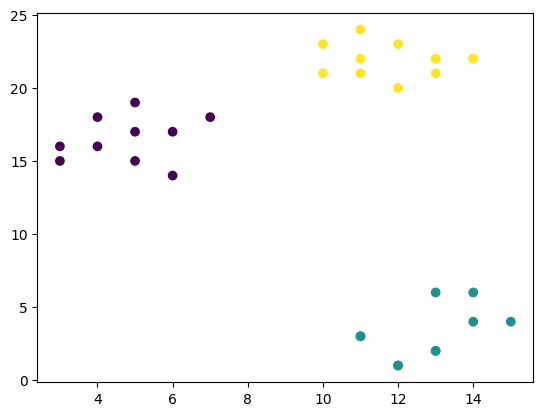

In [23]:
plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [24]:
metrics.silhouette_score(data, c, metric='euclidean')

np.float64(0.7508793049516054)

In [25]:
metrics.calinski_harabasz_score(data, c)

np.float64(291.097772451713)

In [26]:

metrics.davies_bouldin_score(data, c)

np.float64(0.337347487041704)

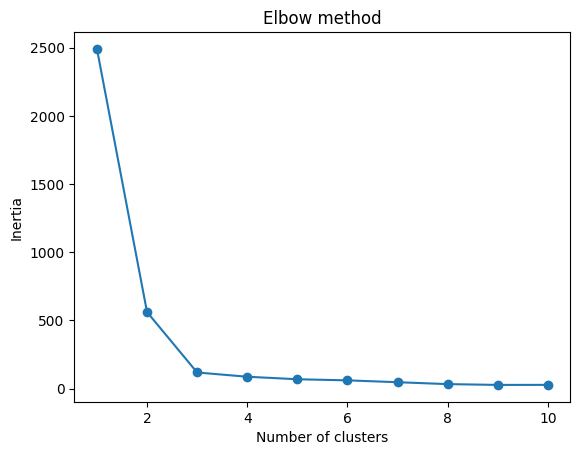

In [27]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

##### Clustering data with higher-dimentions

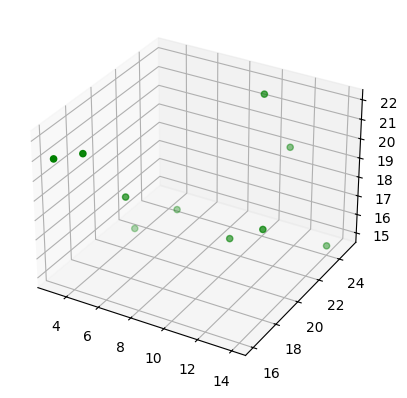

In [28]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
z = [15, 18, 22, 21, 21, 19, 15, 16, 16, 17]

from mpl_toolkits import mplot3d
ax = plt.axes(projection ="3d")

ax.scatter3D(x, y, z, color = "green")
plt.show()

In [29]:
from sklearn.cluster import KMeans

data = list(zip(x, y, z))

kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(data)

c=kmeans.labels_
print(c)

[0 0 1 0 0 1 1 0 1 1]


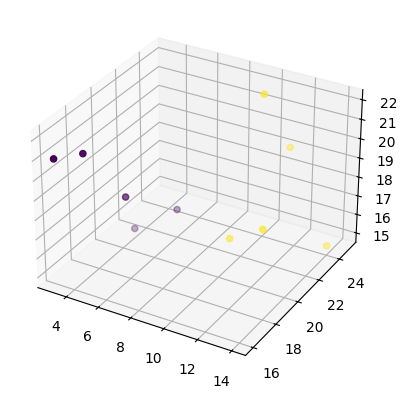

In [30]:
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z, c=kmeans.labels_)
plt.show()

#### Cluster Evaluation without Ground-Truth

In [31]:
metrics.silhouette_score(data, c, metric='euclidean')

np.float64(0.428585111938997)

In [32]:
metrics.calinski_harabasz_score(data, c)

np.float64(11.044067796610168)

In [33]:
metrics.davies_bouldin_score(data, c)

np.float64(0.8027808253784411)

### K-Means Clustering with real dataset without ground truth PCA

back to [Top](#contents)

In [34]:

import pandas as pd

X =pd.read_csv("housing.csv")
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [36]:
X.MedInc

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: MedInc, Length: 20640, dtype: float64

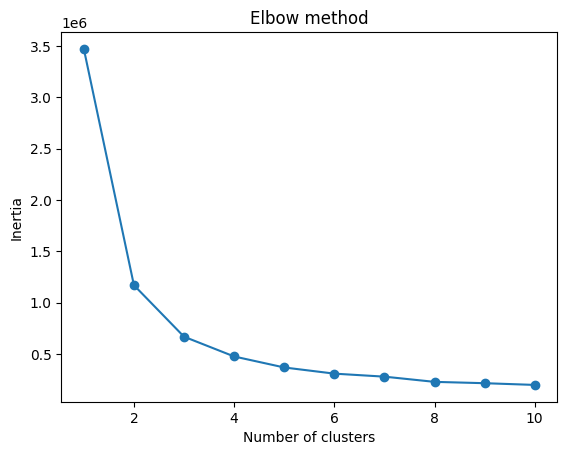

In [37]:
from sklearn.cluster import KMeans

data = list(zip(X.MedInc, X.HouseAge, X.AveRooms))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)    

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### Feature Extraction - Dimensionality Reduction

In [38]:
from sklearn.decomposition import PCA

X_norm = (X - X.min())/(X.max() - X.min())		# min max normalization

pca = PCA(n_components=2) 						#2-dimensional PCA

transformed = pd.DataFrame(pca.fit_transform(X_norm))

In [39]:
print(transformed)

              0         1
0      0.267184  0.648987
1      0.252400  0.282721
2      0.328713  0.585428
3      0.341324  0.536940
4      0.350373  0.503616
...         ...       ...
20635  0.447789 -0.270524
20636  0.436279 -0.325650
20637  0.429064 -0.328828
20638  0.439350 -0.325415
20639  0.420657 -0.330720

[20640 rows x 2 columns]


Visualize the transformed dataset

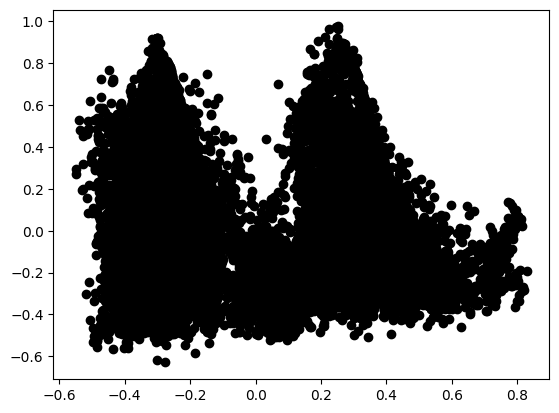

In [40]:
import matplotlib.pyplot as plt

x = transformed[0]
y = transformed[1]

plt.scatter(x, y, color='black')
plt.show()

The K-Means Clustering

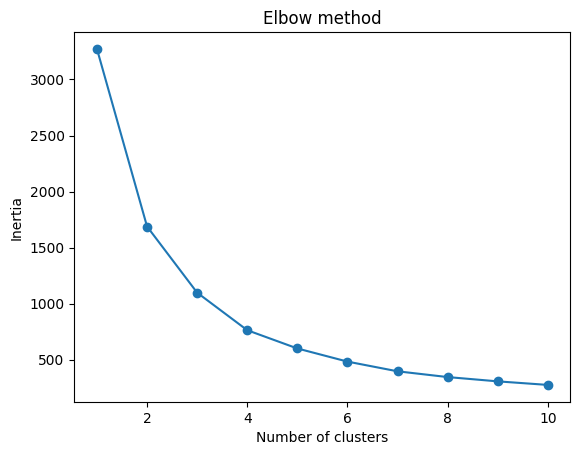

In [41]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [57]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(data)

c=kmeans.labels_
print(c)

[1 1 1 ... 1 1 1]


Visualize the clusters

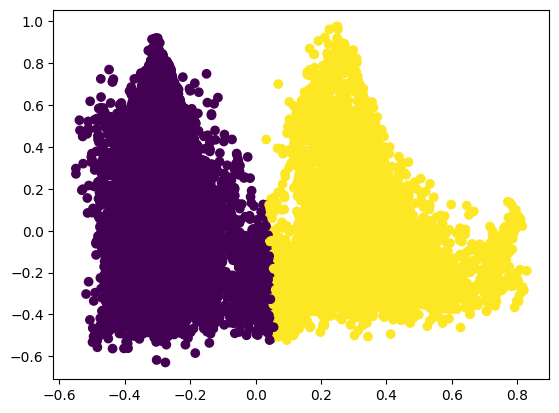

In [58]:
plt.scatter(x, y, c=kmeans.labels_)
plt.show()

##### Cluster Evaluation without Ground-Truth
**Silhouette Coefficient**

The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.

1. The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

2. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

3. The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [59]:
from sklearn import metrics

metrics.silhouette_score(data, c, metric='euclidean')

np.float64(0.4886645705024384)

**Calinski-Harabasz Index**

Also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared).

1. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

2. The score is fast to compute.

3. The Calinski-Harabasz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [60]:
metrics.calinski_harabasz_score(data, c)

np.float64(19356.126198139373)

**Davies-Bouldin Index**

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

1. Zero is the lowest possible score. Values closer to zero indicate a better partition.

2. The computation of Davies-Bouldin is simpler than that of Silhouette scores.

3. The index is solely based on quantities and features inherent to the dataset as its computation only uses point-wise distances

4. The Davies-Boulding index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained from DBSCAN.

5. The usage of centroid distance limits the distance metric to Euclidean space.

In [61]:
metrics.davies_bouldin_score(data, c)

np.float64(0.8602242912536935)

### K-Means Clustering with real datasets with ground truth

back to [Top](#contents)

Visualize and understand the intput data

In [80]:
import pandas as pd

cols =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols',
         'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity',
         'Hue', 'OD280/OD315', 'Proline']

D =pd.read_csv("wine.csv", names=cols)
D.head()

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [81]:
unique = pd.unique(D['Class'])
print(unique)
n = len(unique)

print("No.of.unique values :", n)

[1 2 3]
No.of.unique values : 3


In [82]:
Y = D['Class']
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: int64


In [83]:
X = D.loc[:, D.columns != 'Class']		# remove labels
print(X)

     Alcohol  MalicAcid   Ash  AlcalinityOfAsh  Magnesium  TotalPhenols  \
0      14.23       1.71  2.43             15.6        127          2.80   
1      13.20       1.78  2.14             11.2        100          2.65   
2      13.16       2.36  2.67             18.6        101          2.80   
3      14.37       1.95  2.50             16.8        113          3.85   
4      13.24       2.59  2.87             21.0        118          2.80   
..       ...        ...   ...              ...        ...           ...   
173    13.71       5.65  2.45             20.5         95          1.68   
174    13.40       3.91  2.48             23.0        102          1.80   
175    13.27       4.28  2.26             20.0        120          1.59   
176    13.17       2.59  2.37             20.0        120          1.65   
177    14.13       4.10  2.74             24.5         96          2.05   

     Flavanoids  NonflavanoidPhenols  Proanthocyanins  ColorIntensity   Hue  \
0          3.06     

In [66]:
from sklearn.decomposition import PCA

X_norm = (X - X.min())/(X.max() - X.min())

pca = PCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

In [84]:
from sklearn.decomposition import PCA

X_norm = (X - X.min())/(X.max() - X.min())

pca = PCA(n_components=3) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

In [85]:
print(transformed)

            0         1         2
0    0.706336  0.253193  0.024093
1    0.484977  0.008823 -0.280482
2    0.521172  0.189187  0.196217
3    0.821644  0.580906  0.081110
4    0.202546  0.059467  0.300240
..        ...       ...       ...
173 -0.739510  0.471901  0.209360
174 -0.581781  0.348366  0.083590
175 -0.626313  0.546857 -0.030495
176 -0.572991  0.425516 -0.094537
177 -0.701764  0.513505  0.293910

[178 rows x 3 columns]


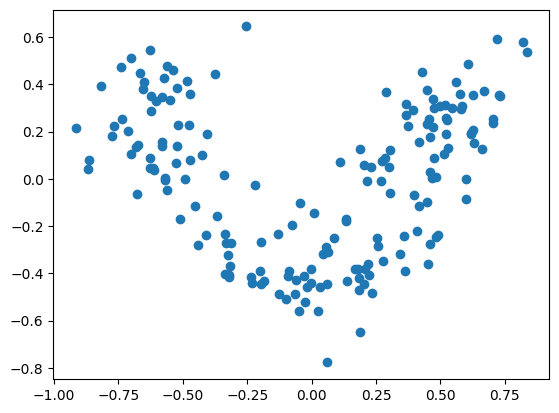

In [86]:
import matplotlib.pyplot as plt

plt.scatter(transformed[0], transformed[1])
plt.show()

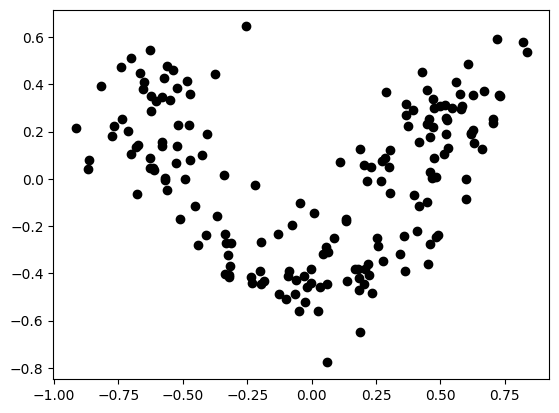

In [87]:
import matplotlib.pyplot as plt

x = transformed[0]
y = transformed[1]
z = transformed[2]

plt.scatter(x, y, color='black')
plt.show()

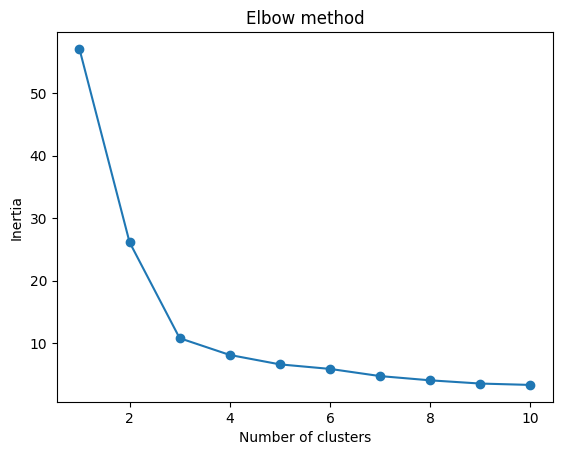

In [70]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

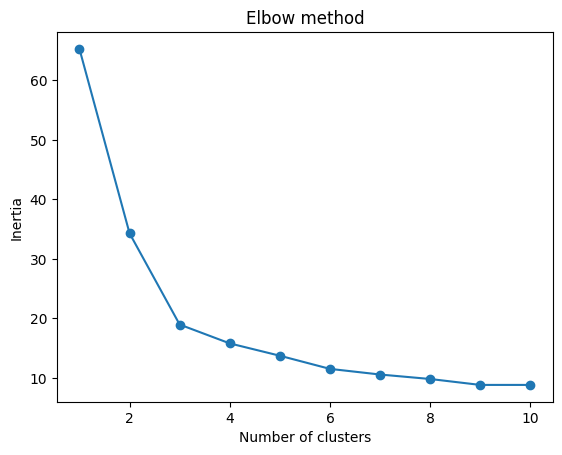

In [88]:
from sklearn.cluster import KMeans

data = list(zip(x, y, z))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The K-Means Clustering

In [89]:
from sklearn.cluster import KMeans

data = list(zip(x, y, z))

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(data)

c=kmeans.labels_
print(c)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 2 2 2 0 2 1 2 1 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


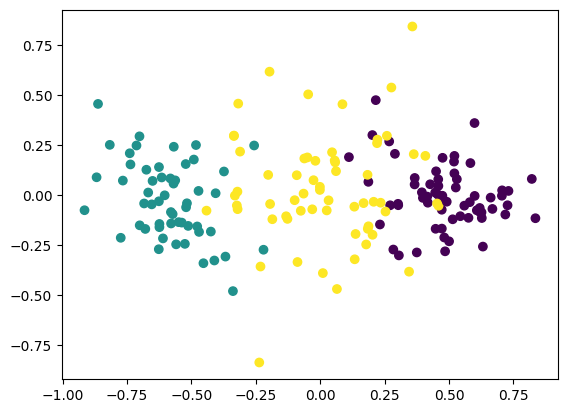

In [90]:
plt.scatter(x, z, c=c)
plt.show()

##### Cluster evaluation with Ground Truth
**Rand index**

Given the knowledge of the ground truth class assignments labels_true and our clustering algorithm assignments of the same samples labels_pred, the (adjusted or unadjusted) Rand index is a function that measures the similarity of the two assignments, ignoring permutations:

In [91]:
from sklearn import metrics

labels_true = Y
labels_pred = c

metrics.rand_score(Y, c)

np.float64(0.9264901923443154)

The Rand index does not ensure to obtain a value close to 0.0 for a random labelling. The adjusted Rand index corrects for chance and will give such a baseline.

1. As with all clustering metrics, one can permute 0 and 1 in the predicted labels, rename 2 to 3, and get the same score.

2. Perfect labeling is scored 1.0

3. Poorly agreeing labels have lower scores, and for the adjusted Rand index the score will be negative or close to zero.

4. However, for the unadjusted Rand index the score, while lower, will not necessarily be close to zero

In [92]:
metrics.adjusted_rand_score(labels_true, labels_pred)

0.8348940044607465

**Mutual Information based scores**

The Mutual Information is a function that measures the agreement of the two assignments, ignoring permutations. Two different normalized versions of this measure are available, Normalized Mutual Information (NMI) and Adjusted Mutual Information (AMI). NMI is often used in the literature, while AMI was proposed more recently and is normalized against chance:

1. One can permute 0 and 1 in the predicted labels, rename 2 to 3 and get the same score

2. All, mutual_info_score, adjusted_mutual_info_score and normalized_mutual_info_score are symmetric: swapping the argument does not change the score.

3. Perfect labeling is scored 1.0; this is not true for mutual_info_score, which is therefore harder to judge.

4. Bad (e.g. independent labelings) have non-positive scores.

In [93]:
metrics.adjusted_mutual_info_score(labels_true, labels_pred)

np.float64(0.8196625011950509)

**Homogeneity, completeness and V-measure**

- Homogeneity: Each cluster contains only members of a single class.
- Completeness: All members of a given class are assigned to the same cluster.
- Their harmonic mean called V-measure is computed by v_measure_score.
1. 0.0 is as bad as it can be, 1.0 is a perfect score.
2. beta is by default = 1; To change the hyperparameter use:
	>>> metrics.v_measure_score(labels_true, labels_pred, beta=0.6)

3. More weight will be attributed to homogeneity, and using a value greater than 1.

In [94]:
metrics.homogeneity_score(labels_true, labels_pred)

np.float64(0.8254943397758124)

In [95]:
metrics.completeness_score(labels_true, labels_pred)

np.float64(0.817641284673183)

In [96]:
metrics.v_measure_score(labels_true, labels_pred)

np.float64(0.8215490461307172)

**Fowlkes-Mallows scores**

The Fowlkes-Mallows score FMI is defined as the geometric mean of the pairwise precision and recall.

1. The score ranges from 0 to 1. A high value indicates a good similarity between two clusters.

2. One can permute 0 and 1 in the predicted labels, rename 2 to 3 and get the same score.

3. Perfect labeling is scored 1.0

4. Bad (e.g. independent labelings) have zero scores.

In [97]:
metrics.fowlkes_mallows_score(labels_true, labels_pred)

np.float64(0.890160473181402)

### Hierarchical Clustering

back to [Top](#contents)

Step 1: Compute the proximity matrix using a particular distance metric

Step 2: Each data point is assigned to a cluster

Step 3: Merge the clusters based on a metric for the similarity between clusters

Step 4: Update the distance matrix

Step 5: Repeat Step 3 and Step 4 until only a single cluster remains

Visualize and understand the intput data

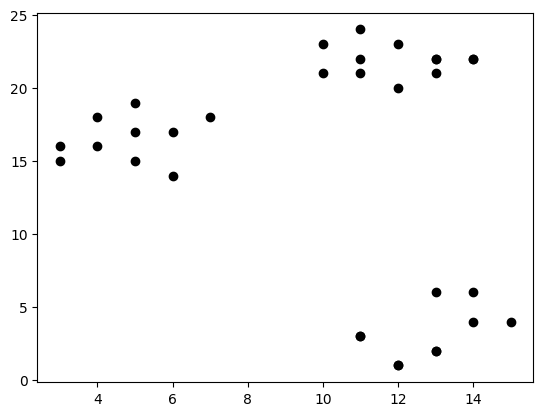

In [98]:
import matplotlib.pyplot as plt

x = [ 5,  4, 13, 11, 13,  5,  3,  4,  3, 10, 12, 13, 14, 12, 11,  6,  7,  6,  5, 11, 14, 10, 12, 13, 14, 12, 11, 13, 11, 13, 14, 15]
y = [15, 18, 22, 21, 21, 19, 15, 16, 16, 21, 23, 22, 22, 20, 22, 17, 18, 14, 17, 24, 22, 23,  1,  2,  4,  1,  3,  6,  3,  2,  6,  4]

plt.scatter(x, y, color='black')
plt.show()

The Hierarchical Clustering - Agglomerative clustering

In [99]:
from scipy.cluster.hierarchy import dendrogram, linkage

data = list(zip(x, y))

# Min-Linkage
'''
The advantage of the Min method is that it can accurately handle non-elliptical shapes.
The disadvantages are that it is sensitive to noise and outliers.
'''
Z1 = linkage(data, method='single', metric='euclidean')

# Max-Linkage
'''
Max is less sensitive to noise and outliers in comparison to MIN method.
However, MAX can break large clusters and tends to be biased towards globular clusters.
'''
Z2 = linkage(data, method='complete', metric='euclidean')

# Average-Linkage
'''
The Average method defines the distance between clusters as the average pairwise distance among all pairs of points in the clusters.
'''
Z3 = linkage(data, method='average', metric='euclidean')

# Ward-Linkage
'''
 The Ward method attempts to minimize the sum of the squared distances of the points from the cluster centers.
 Compared to the distance-based measures, the Ward method is less susceptible to noise and outliers.
'''
Z4 = linkage(data, method='ward', metric='euclidean')

# Centroid-Linkage
'''
 The Ward method attempts to minimize the sum of the squared distances of the points from the cluster centers.
 Compared to the distance-based measures, the Ward method is less susceptible to noise and outliers.
'''
Z5 = linkage(data, method='centroid', metric='euclidean')

Visualize the clusters

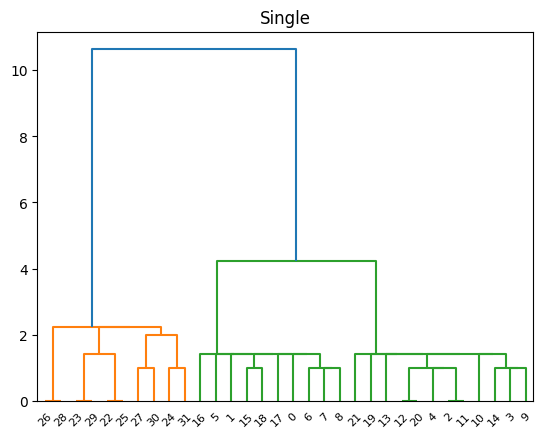

In [100]:
# Single linkage dendogram plot
plt.plot(2,2,1), dendrogram(Z1), plt.title('Single')
plt.show()

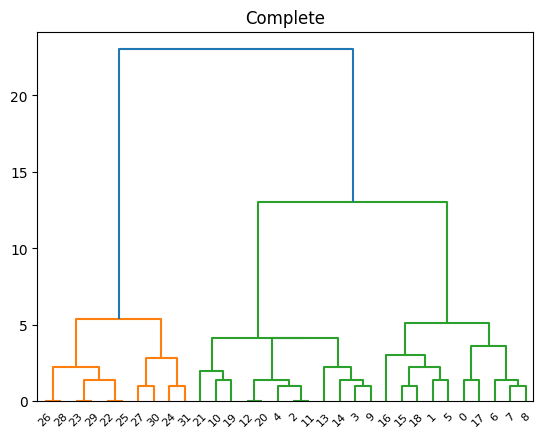

In [101]:
# Complete linkage dendogram plot
plt.plot(2,2,2), dendrogram(Z2), plt.title('Complete')
plt.show()

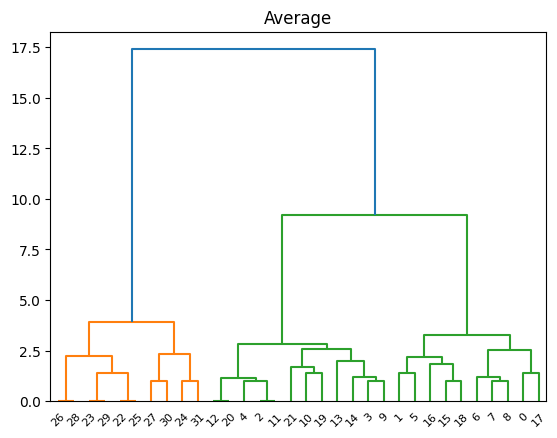

In [102]:
# Average linkage dendogram plot
plt.plot(2,2,3), dendrogram(Z3), plt.title('Average')
plt.show()

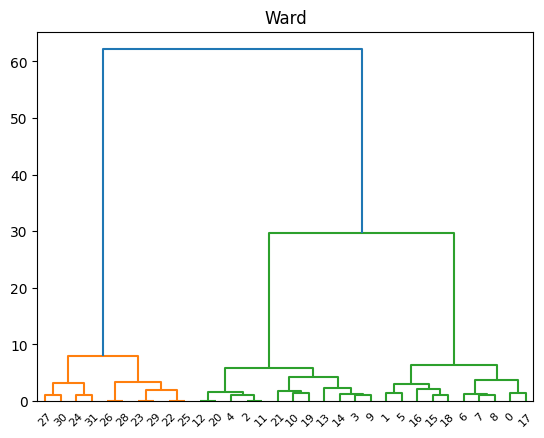

In [103]:
# Ward linkage dendogram plot
plt.plot(2,2,4), dendrogram(Z4), plt.title('Ward')
plt.show()

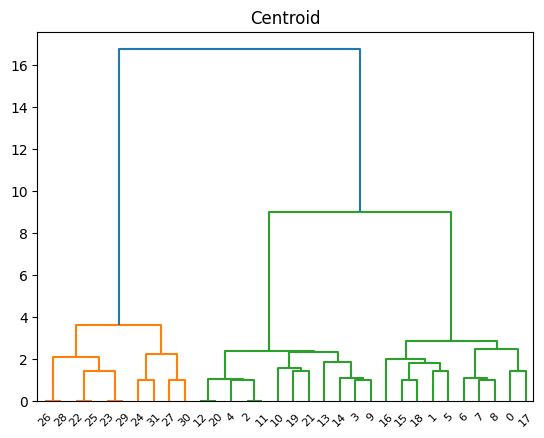

In [104]:
# Centroid linkage dendogram plot
plt.plot(2,2,5), dendrogram(Z5), plt.title('Centroid')
plt.show()

In [105]:
from scipy.cluster.hierarchy import fcluster

c = fcluster(Z4, 3, criterion='maxclust')

print(f"Clusters: {c}")

Clusters: [3 3 2 2 2 3 3 3 3 2 2 2 2 2 2 3 3 3 3 2 2 2 1 1 1 1 1 1 1 1 1 1]


##### Cluster Evaluation without Ground-Truth
**Silhouette Coefficient**

The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.

1. The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

2. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

3. The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [106]:
from sklearn import metrics

metrics.silhouette_score(data, c, metric='euclidean')

np.float64(0.7508793049516054)

**Calinski-Harabasz Index**

Also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared).

1. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

2. The score is fast to compute.

3. The Calinski-Harabasz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [107]:
metrics.calinski_harabasz_score(data, c)

np.float64(291.097772451713)

**Davies-Bouldin Index**

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

1. Zero is the lowest possible score. Values closer to zero indicate a better partition.

2. The computation of Davies-Bouldin is simpler than that of Silhouette scores.

3. The index is solely based on quantities and features inherent to the dataset as its computation only uses point-wise distances

4. The Davies-Boulding index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained from DBSCAN.

5. The usage of centroid distance limits the distance metric to Euclidean space.

In [108]:
metrics.davies_bouldin_score(data, c)

np.float64(0.3373474870417039)